# Data Manipulation

## Reading the data

In [2]:
import pandas as pd

new_new_df = pd.read_csv('top_100_100_twitter_movie_1.csv')
gbtest = new_new_df.groupby("user_id")

In [1]:
import numpy as np
import json

filename = 'array_twitter.csv'

# Read the array from the CSV file
mat = np.loadtxt(filename, delimiter=',')

## reading genre mapping and user mapping

In [4]:
with open('genre_map_twitter.txt', 'r') as file:
    genre_map = json.load(file)

print(genre_map)

{'Action|Adventure': 0, 'Action|Adventure|Biography|Drama|Western': 1, 'Action|Adventure|Comedy': 2, 'Action|Adventure|Comedy|Fantasy': 3, 'Action|Adventure|Comedy|Sci-Fi': 4, 'Action|Adventure|Drama': 5, 'Action|Adventure|Drama|Fantasy': 6, 'Action|Adventure|Drama|Sci-Fi': 7, 'Action|Adventure|Fantasy': 8, 'Action|Adventure|Fantasy|Sci-Fi': 9, 'Action|Adventure|Horror|Sci-Fi|Thriller': 10, 'Action|Adventure|Sci-Fi': 11, 'Action|Adventure|Sci-Fi|Thriller': 12, 'Action|Adventure|Thriller': 13, 'Action|Biography|Drama|Sport': 14, 'Action|Biography|Drama|War': 15, 'Action|Comedy|Crime': 16, 'Action|Comedy|Crime|Thriller': 17, 'Action|Crime': 18, 'Action|Crime|Drama|Mystery|Thriller': 19, 'Action|Crime|Drama|Thriller': 20, 'Action|Crime|Sci-Fi|Thriller': 21, 'Action|Crime|Thriller': 22, 'Action|Drama': 23, 'Action|Drama|History|Thriller|War': 24, 'Action|Drama|Sci-Fi': 25, 'Action|Drama|Sci-Fi|Thriller': 26, 'Action|Drama|Thriller': 27, 'Action|Drama|War': 28, 'Action|Horror|Sci-Fi|Thrille

In [3]:
with open('user_id_map_twitter.txt', 'r') as file:
    user_id_map = json.load(file)
user_id_map = {(float(key)): value for key, value in user_id_map.items()}
print(user_id_map)

{111.0: 0, 1174.0: 1, 1619.0: 2, 2191.0: 3, 2324.0: 4, 3306.0: 5, 3616.0: 6, 4299.0: 7, 4519.0: 8, 6161.0: 9, 7567.0: 10, 8988.0: 11, 9157.0: 12, 9532.0: 13, 10172.0: 14, 11929.0: 15, 12569.0: 16, 13793.0: 17, 14753.0: 18, 17177.0: 19, 17907.0: 20, 19041.0: 21, 19704.0: 22, 20122.0: 23, 20270.0: 24, 20462.0: 25, 21014.0: 26, 22414.0: 27, 24059.0: 28, 25334.0: 29, 25460.0: 30, 25744.0: 31, 26109.0: 32, 26329.0: 33, 26459.0: 34, 26613.0: 35, 26760.0: 36, 27318.0: 37, 27875.0: 38, 28529.0: 39, 28647.0: 40, 29070.0: 41, 29082.0: 42, 29129.0: 43, 31698.0: 44, 31960.0: 45, 32877.0: 46, 33289.0: 47, 33689.0: 48, 38735.0: 49, 39078.0: 50, 39483.0: 51, 39685.0: 52, 40323.0: 53, 41285.0: 54, 42467.0: 55, 42632.0: 56, 42904.0: 57, 43374.0: 58, 43691.0: 59, 46174.0: 60, 47936.0: 61, 48526.0: 62, 48888.0: 63, 49471.0: 64, 50018.0: 65, 51162.0: 66, 51665.0: 67, 52241.0: 68, 52285.0: 69, 52711.0: 70, 52864.0: 71, 55479.0: 72, 56414.0: 73, 57556.0: 74, 57772.0: 75, 58508.0: 76, 59017.0: 77, 60813.0: 7

## Using genre wise average ratings of each user instead of SVNS

In [5]:
#function to find average rating
def avg_rating(df):
    temp = [ 0 for i in range(new_new_df['genre'].nunique())]
    df = df.reset_index()
    sum = 0
    for g in df['genre'].unique():
        #print(g)
        rat = df[df['genre'] == g]
        avg = rat["rating"].mean()     
        temp[genre_map[g]]= avg
    return temp   

In [6]:
u_g_avg = pd.DataFrame(gbtest.apply(avg_rating)).reset_index()
u_g_avg

,user_id,0
0,111,"[0, 7.0, 6.5, 6.5, 7.166666666666667, 8.0, 8.0..."
1,1174,"[7.4, 0, 4.0, 3.5, 7.5, 6.5, 4.0, 7.5, 2.0, 7...."
2,1619,"[0, 7.0, 7.0, 6.5, 7.4, 6.0, 0, 8.0, 7.0, 6.27..."
3,2191,"[7.0, 0, 6.333333333333333, 8.0, 7.5, 0, 0, 0,..."
4,2324,"[8.0, 9.0, 6.0, 6.0, 7.571428571428571, 8.0, 6..."
...,...,...
95,70284,"[0, 8.0, 0, 0, 7.5, 6.0, 0, 5.0, 3.25, 6.0, 0,..."
96,70408,"[8.0, 8.0, 2.5, 0, 7.0, 6.0, 4.0, 6.0, 5.33333..."
97,70581,"[7.666666666666667, 7.0, 6.333333333333333, 8...."
98,70606,"[0, 2.0, 0, 0, 3.6666666666666665, 7.0, 5.5, 8..."


In [7]:
test_crossjoin1 = u_g_avg
test_crossjoin1['key'] = 1
resultx = pd.merge(test_crossjoin1, test_crossjoin1, on ='key').drop(["key"],axis=1)
resultx

,user_id_x,0_x,user_id_y,0_y
0,111,"[0, 7.0, 6.5, 6.5, 7.166666666666667, 8.0, 8.0...",111,"[0, 7.0, 6.5, 6.5, 7.166666666666667, 8.0, 8.0..."
1,111,"[0, 7.0, 6.5, 6.5, 7.166666666666667, 8.0, 8.0...",1174,"[7.4, 0, 4.0, 3.5, 7.5, 6.5, 4.0, 7.5, 2.0, 7...."
2,111,"[0, 7.0, 6.5, 6.5, 7.166666666666667, 8.0, 8.0...",1619,"[0, 7.0, 7.0, 6.5, 7.4, 6.0, 0, 8.0, 7.0, 6.27..."
3,111,"[0, 7.0, 6.5, 6.5, 7.166666666666667, 8.0, 8.0...",2191,"[7.0, 0, 6.333333333333333, 8.0, 7.5, 0, 0, 0,..."
4,111,"[0, 7.0, 6.5, 6.5, 7.166666666666667, 8.0, 8.0...",2324,"[8.0, 9.0, 6.0, 6.0, 7.571428571428571, 8.0, 6..."
...,...,...,...,...
9995,70664,"[6.0, 9.0, 0, 0, 7.666666666666667, 5.0, 0, 7....",70284,"[0, 8.0, 0, 0, 7.5, 6.0, 0, 5.0, 3.25, 6.0, 0,..."
9996,70664,"[6.0, 9.0, 0, 0, 7.666666666666667, 5.0, 0, 7....",70408,"[8.0, 8.0, 2.5, 0, 7.0, 6.0, 4.0, 6.0, 5.33333..."
9997,70664,"[6.0, 9.0, 0, 0, 7.666666666666667, 5.0, 0, 7....",70581,"[7.666666666666667, 7.0, 6.333333333333333, 8...."
9998,70664,"[6.0, 9.0, 0, 0, 7.666666666666667, 5.0, 0, 7....",70606,"[0, 2.0, 0, 0, 3.6666666666666665, 7.0, 5.5, 8..."


### Mapping each pair of users with their average rating list and cosine similarity

In [8]:
def mapping_userid_xandy(row):
    return mat[user_id_map[row['user_id_x']],user_id_map[row['user_id_y']]]

In [9]:
resultx["cosin"] = resultx.apply(mapping_userid_xandy,axis = 1)
resultx

,user_id_x,0_x,user_id_y,0_y,cosin
0,111,"[0, 7.0, 6.5, 6.5, 7.166666666666667, 8.0, 8.0...",111,"[0, 7.0, 6.5, 6.5, 7.166666666666667, 8.0, 8.0...",1.000000
1,111,"[0, 7.0, 6.5, 6.5, 7.166666666666667, 8.0, 8.0...",1174,"[7.4, 0, 4.0, 3.5, 7.5, 6.5, 4.0, 7.5, 2.0, 7....",0.278199
2,111,"[0, 7.0, 6.5, 6.5, 7.166666666666667, 8.0, 8.0...",1619,"[0, 7.0, 7.0, 6.5, 7.4, 6.0, 0, 8.0, 7.0, 6.27...",0.242871
3,111,"[0, 7.0, 6.5, 6.5, 7.166666666666667, 8.0, 8.0...",2191,"[7.0, 0, 6.333333333333333, 8.0, 7.5, 0, 0, 0,...",0.087078
4,111,"[0, 7.0, 6.5, 6.5, 7.166666666666667, 8.0, 8.0...",2324,"[8.0, 9.0, 6.0, 6.0, 7.571428571428571, 8.0, 6...",0.317718
...,...,...,...,...,...
9995,70664,"[6.0, 9.0, 0, 0, 7.666666666666667, 5.0, 0, 7....",70284,"[0, 8.0, 0, 0, 7.5, 6.0, 0, 5.0, 3.25, 6.0, 0,...",0.125703
9996,70664,"[6.0, 9.0, 0, 0, 7.666666666666667, 5.0, 0, 7....",70408,"[8.0, 8.0, 2.5, 0, 7.0, 6.0, 4.0, 6.0, 5.33333...",0.185392
9997,70664,"[6.0, 9.0, 0, 0, 7.666666666666667, 5.0, 0, 7....",70581,"[7.666666666666667, 7.0, 6.333333333333333, 8....",0.203935
9998,70664,"[6.0, 9.0, 0, 0, 7.666666666666667, 5.0, 0, 7....",70606,"[0, 2.0, 0, 0, 3.6666666666666665, 7.0, 5.5, 8...",0.216612


In [10]:
resultx['0_x'][0]

[0,
 7.0,
 6.5,
 6.5,
 7.166666666666667,
 8.0,
 8.0,
 5.5,
 6.25,
 7.2,
 0,
 6.714285714285714,
 7.2,
 7.5,
 0,
 7.0,
 6.0,
 7.0,
 0,
 7.5,
 6.25,
 0,
 6.0,
 0,
 7.5,
 0,
 7.5,
 7.0,
 0,
 6.0,
 7.0,
 0,
 7.25,
 6.75,
 0,
 0,
 0,
 9.0,
 6.666666666666667,
 5.0,
 7.0,
 7.666666666666667,
 7.333333333333333,
 6.428571428571429,
 4.0,
 6.5,
 6.333333333333333,
 7.0,
 7.333333333333333,
 7.0,
 7.1,
 7.166666666666667,
 6.666666666666667,
 6.25,
 7.0,
 6.333333333333333,
 8.0,
 5.833333333333333,
 6.0,
 7.5,
 8.0,
 6.55,
 6.875,
 0,
 7.0,
 6.25,
 7.0,
 5.571428571428571,
 7.0,
 0,
 7.0,
 0,
 7.75,
 6.85,
 8.0,
 8.0,
 6.0,
 6.0,
 6.75,
 4.5,
 7.333333333333333,
 6.5,
 6.5,
 6.8,
 6.5,
 6.05,
 6.0,
 4.666666666666667,
 5.5,
 8.0,
 6.636363636363637,
 7.0,
 7.0,
 7.0,
 4.0,
 6.125,
 5.666666666666667,
 7.166666666666667,
 0,
 6.0]

In [11]:
import math
def genre_wise_pearsonsimilarity(row):
    temp = [ 0 for i in range(len(resultx['0_x'][0]))]
    for j in range(0,len(row)):
        #temp[j] = (np.corrcoef(row['0_x'][j], row['0_y'][j])[0, 1])
        temp[j] = (row['0_x'][j] + row['0_y'][j])/2
    return temp

In [12]:
result_avg = pd.DataFrame()
result_avg['User1'] = resultx['user_id_x']
result_avg['User2'] = resultx['user_id_y']

In [13]:
result_avg['genre_based_cosinesimilarity'] = resultx.apply(genre_wise_pearsonsimilarity,axis=1)

In [14]:
result_avg["Cosine_between_user"] = resultx['cosin']
result_avg

,User1,User2,genre_based_cosinesimilarity,Cosine_between_user
0,111,111,"[0.0, 7.0, 6.5, 6.5, 7.166666666666667, 0, 0, ...",1.000000
1,111,1174,"[3.7, 3.5, 5.25, 5.0, 7.333333333333334, 0, 0,...",0.278199
2,111,1619,"[0.0, 7.0, 6.75, 6.5, 7.283333333333333, 0, 0,...",0.242871
3,111,2191,"[3.5, 3.5, 6.416666666666666, 7.25, 7.33333333...",0.087078
4,111,2324,"[4.0, 8.0, 6.25, 6.25, 7.369047619047619, 0, 0...",0.317718
...,...,...,...,...
9995,70664,70284,"[3.0, 8.5, 0.0, 0.0, 7.583333333333334, 0, 0, ...",0.125703
9996,70664,70408,"[7.0, 8.5, 1.25, 0.0, 7.333333333333334, 0, 0,...",0.185392
9997,70664,70581,"[6.833333333333334, 8.0, 3.1666666666666665, 4...",0.203935
9998,70664,70606,"[3.0, 5.5, 0.0, 0.0, 5.666666666666667, 0, 0, ...",0.216612


In [15]:
# splitting each element of the list as a new feature

r_test_avg = pd.DataFrame(result_avg['genre_based_cosinesimilarity'])
r_test_avg = pd.DataFrame(r_test_avg.genre_based_cosinesimilarity.tolist(), index= r_test_avg.index)
r_test_avg["Cosine_between_user"] = resultx['cosin']
r_test_avg

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Cosine_between_user
0,0.000000,7.0,6.500000,6.50,7.166667,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.000000
1,3.700000,3.5,5.250000,5.00,7.333333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.278199
2,0.000000,7.0,6.750000,6.50,7.283333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.242871
3,3.500000,3.5,6.416667,7.25,7.333333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.087078
4,4.000000,8.0,6.250000,6.25,7.369048,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.317718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3.000000,8.5,0.000000,0.00,7.583333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.125703
9996,7.000000,8.5,1.250000,0.00,7.333333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.185392
9997,6.833333,8.0,3.166667,4.00,7.933333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.203935
9998,3.000000,5.5,0.000000,0.00,5.666667,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.216612


In [16]:
r_test_avg.to_csv("training_data_twitter_baseline.csv")

# Training Regression Models 

In [17]:
train_twitter_base = pd.read_csv("training_data_twitter_baseline.csv")

In [18]:
from pycaret.regression import *
exp_reg101 = setup(data = train_twitter_base, target = 'Cosine_between_user',session_id = 123)

,Description,Value
0,Session id,123
1,Target,Cosine_between_user
2,Target type,Regression
3,Original data shape,"(10000, 102)"
4,Transformed data shape,"(10000, 102)"
5,Transformed train set shape,"(7000, 102)"
6,Transformed test set shape,"(3000, 102)"
7,Numeric features,101
8,Preprocess,True
9,Imputation type,simple


In [19]:
best_anime = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0438,0.0086,0.0923,0.3321,0.0647,0.2862,1.6070
lightgbm,Light Gradient Boosting Machine,0.0530,0.0087,0.0929,0.3237,0.0665,0.3563,1.1270
rf,Random Forest Regressor,0.0496,0.0090,0.0946,0.2960,0.0671,0.3263,2.1490
xgboost,Extreme Gradient Boosting,0.0513,0.0092,0.0956,0.2798,0.0679,0.3278,1.7780
gbr,Gradient Boosting Regressor,0.0578,0.0096,0.0978,0.2497,0.0709,0.4172,1.3070
lr,Linear Regression,0.0659,0.0112,0.1052,0.1317,0.0779,0.5248,1.5730
ridge,Ridge Regression,0.0659,0.0112,0.1052,0.1317,0.0779,0.5248,0.9210
omp,Orthogonal Matching Pursuit,0.0659,0.0112,0.1052,0.1317,0.0779,0.5248,0.9220
br,Bayesian Ridge,0.0659,0.0112,0.1052,0.1317,0.0779,0.5255,0.9780
huber,Huber Regressor,0.0656,0.0112,0.1054,0.1291,0.0779,0.5025,1.1730


## Tuning and plotting the top 5 models

In [20]:
XGBOOST = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0488,0.0071,0.0842,0.3146,0.0614,0.2966
1,0.0539,0.0121,0.1102,0.3022,0.0754,0.3402
2,0.0513,0.0084,0.0917,0.1760,0.0670,0.3292
3,0.0515,0.0099,0.0995,0.2498,0.0703,0.3577
4,0.0536,0.0100,0.1001,0.2201,0.0711,0.3177
5,0.0545,0.0117,0.1080,0.2294,0.0754,0.3625
6,0.0512,0.0074,0.0861,0.3848,0.0626,0.3219
7,0.0486,0.0090,0.0948,0.3801,0.0653,0.2749
8,0.0492,0.0076,0.0869,0.3384,0.0627,0.3419


In [21]:
tuned_XGBOOST, tuner_xgboost = tune_model(XGBOOST, return_tuner=True,choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0564,0.0081,0.0897,0.2216,0.0670,0.3464
1,0.0602,0.0131,0.1145,0.2471,0.0796,0.4078
2,0.0586,0.0084,0.0918,0.1738,0.0685,0.3684
3,0.0557,0.0108,0.1038,0.1837,0.0740,0.4060
4,0.0600,0.0101,0.1006,0.2125,0.0727,0.3576
5,0.0583,0.0108,0.1041,0.2845,0.0737,0.3945
6,0.0584,0.0086,0.0927,0.2877,0.0682,0.3754
7,0.0558,0.0098,0.0989,0.3254,0.0700,0.3422
8,0.0532,0.0078,0.0881,0.3201,0.0644,0.3507


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [22]:
print(tuner_xgboost)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=FastMemory(location=C:\Users\abhij\AppData\Local\Temp\joblib),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['Unnamed: '
                                                                          '0',
                                                                          '0',
                                                                          '1',
                                                                          '2',
                                                                          '3',
                                                                          '4',
                                                                          '5',
                                                                          '6',
                               

In [23]:
with open('tuner_xgboost_twitter_nosvns.txt', 'w') as file:
    file.write(str(tuner_xgboost))

In [24]:
tuned_XGBOOST

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=123, ...)

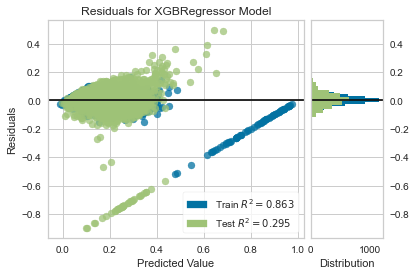

In [25]:
plot_model(tuned_XGBOOST)

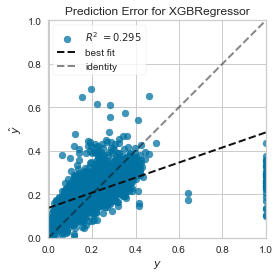

In [26]:
plot_model(tuned_XGBOOST, plot='error')

In [27]:
randomforest = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0482,0.0074,0.0859,0.2872,0.0623,0.3032
1,0.0554,0.0128,0.1130,0.2662,0.0777,0.3690
2,0.0475,0.0077,0.0877,0.2469,0.0639,0.3090
3,0.0496,0.0097,0.0987,0.2622,0.0696,0.3588
4,0.0504,0.0093,0.0964,0.2769,0.0679,0.3058
5,0.0517,0.0109,0.1046,0.2774,0.0727,0.3426
6,0.0487,0.0073,0.0854,0.3949,0.0618,0.3186
7,0.0485,0.0088,0.0936,0.3965,0.0650,0.2999
8,0.0486,0.0074,0.0862,0.3491,0.0623,0.3315


In [28]:
tuned_randomforest, tuner_rf = tune_model(randomforest, return_tuner=True, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0612,0.0087,0.0931,0.1613,0.0704,0.4559
1,0.0714,0.0149,0.1221,0.1441,0.0869,0.5983
2,0.0585,0.0081,0.0901,0.2043,0.0676,0.4436
3,0.0649,0.0114,0.1067,0.1364,0.0782,0.5910
4,0.0643,0.0110,0.1051,0.1399,0.0763,0.4489
5,0.0689,0.0133,0.1152,0.1234,0.0832,0.5911
6,0.0649,0.0097,0.0984,0.1967,0.0738,0.5215
7,0.0654,0.0116,0.1076,0.2023,0.0778,0.4889
8,0.0621,0.0093,0.0963,0.1883,0.0717,0.4744


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [29]:
print(tuner_rf)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=FastMemory(location=C:\Users\abhij\AppData\Local\Temp\joblib),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['Unnamed: '
                                                                          '0',
                                                                          '0',
                                                                          '1',
                                                                          '2',
                                                                          '3',
                                                                          '4',
                                                                          '5',
                                                                          '6',
                               

In [30]:
with open('tuner_random_forest_twitter_nosvns.txt', 'w') as file:
    file.write(str(tuner_rf))

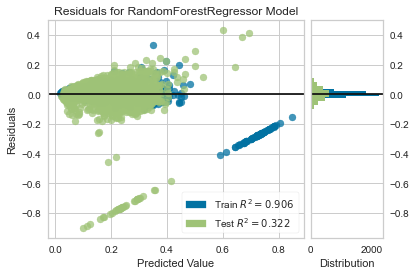

In [31]:
plot_model(tuned_randomforest)

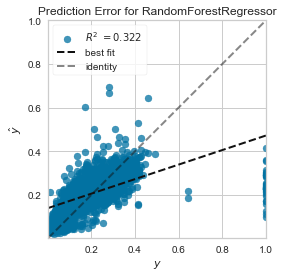

In [32]:
plot_model(tuned_randomforest, plot='error')

In [33]:
LightgradientBoost = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0507,0.0069,0.0831,0.3318,0.0613,0.3315
1,0.0574,0.0124,0.1116,0.2849,0.0771,0.4030
2,0.0504,0.0065,0.0809,0.3582,0.0598,0.3222
3,0.0529,0.0095,0.0973,0.2823,0.0694,0.4097
4,0.0535,0.0092,0.0958,0.2851,0.0680,0.3245
5,0.0574,0.0113,0.1065,0.2514,0.0749,0.4162
6,0.0533,0.0076,0.0871,0.3712,0.0636,0.3556
7,0.0519,0.0090,0.0950,0.3775,0.0665,0.3217
8,0.0507,0.0071,0.0844,0.3759,0.0612,0.3524


In [34]:
tuned_LightgradientBoost, tuner_lgbm = tune_model(LightgradientBoost, return_tuner=True, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0591,0.0084,0.0915,0.1898,0.0692,0.4451
1,0.0693,0.0142,0.1192,0.1840,0.0846,0.5738
2,0.0567,0.0076,0.0874,0.2505,0.0656,0.4316
3,0.0628,0.0108,0.1038,0.1841,0.0758,0.5680
4,0.0627,0.0104,0.1021,0.1888,0.0741,0.4419
5,0.0672,0.0129,0.1138,0.1455,0.0820,0.5652
6,0.0618,0.0091,0.0955,0.2443,0.0714,0.4958
7,0.0626,0.0108,0.1039,0.2552,0.0751,0.4787
8,0.0602,0.0088,0.0937,0.2314,0.0696,0.4645


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [35]:
with open('tuner_light_gradient_boost_twitter_nosvns.txt', 'w') as file:
    file.write(str(tuner_lgbm))

In [36]:
tuned_LightgradientBoost

LGBMRegressor(random_state=123)

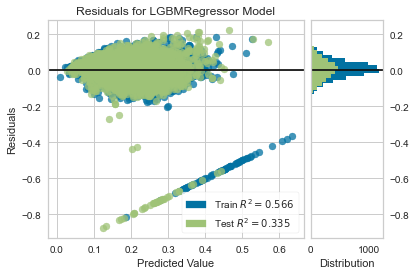

In [37]:
plot_model(tuned_LightgradientBoost)

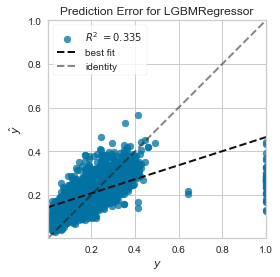

In [38]:
plot_model(tuned_LightgradientBoost, plot='error')

In [39]:
extratrees = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0412,0.0065,0.0804,0.3751,0.0579,0.2620
1,0.0480,0.0124,0.1114,0.2865,0.0757,0.3369
2,0.0428,0.0068,0.0822,0.3371,0.0595,0.2724
3,0.0427,0.0097,0.0985,0.2651,0.0683,0.3158
4,0.0449,0.0090,0.0947,0.3023,0.0658,0.2731
5,0.0455,0.0105,0.1025,0.3066,0.0705,0.2875
6,0.0428,0.0069,0.0831,0.4270,0.0593,0.2716
7,0.0436,0.0086,0.0927,0.4075,0.0637,0.2687
8,0.0432,0.0074,0.0858,0.3554,0.0614,0.2832


In [40]:
tuned_extratrees, tuner_et = tune_model(extratrees, return_tuner=True, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0691,0.0098,0.0991,0.0511,0.0759,0.5265
1,0.0793,0.0167,0.1292,0.0417,0.0935,0.7014
2,0.0666,0.0096,0.0979,0.0610,0.0746,0.5371
3,0.0722,0.0126,0.1123,0.0434,0.0836,0.6939
4,0.0709,0.0123,0.1109,0.0421,0.0817,0.5207
5,0.0753,0.0146,0.1209,0.0343,0.0886,0.6883
6,0.0736,0.0113,0.1063,0.0623,0.0809,0.6277
7,0.0744,0.0136,0.1165,0.0641,0.0859,0.5896
8,0.0699,0.0108,0.1039,0.0547,0.0785,0.5529


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [41]:
with open('tuner_extra_trees_twitter_nosvns.txt', 'w') as file:
    file.write(str(tuner_et))

In [42]:
tuned_extratrees

ExtraTreesRegressor(n_jobs=-1, random_state=123)

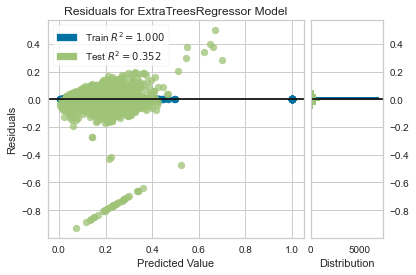

In [43]:
plot_model(tuned_extratrees)

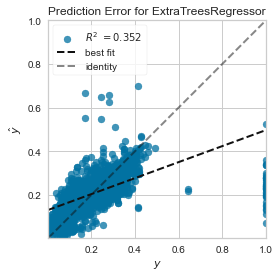

In [44]:
plot_model(tuned_extratrees, plot='error')

In [45]:
gradientboost = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0549,0.0078,0.0880,0.2507,0.0657,0.3795
1,0.0629,0.0136,0.1167,0.2177,0.0818,0.4770
2,0.0552,0.0083,0.0913,0.1825,0.0675,0.3939
3,0.0583,0.0101,0.1007,0.2316,0.0727,0.4897
4,0.0591,0.0099,0.0995,0.2283,0.0716,0.3816
5,0.0623,0.0123,0.1110,0.1866,0.0792,0.4582
6,0.0580,0.0086,0.0930,0.2833,0.0685,0.4120
7,0.0567,0.0094,0.0972,0.3488,0.0691,0.3913
8,0.0557,0.0082,0.0903,0.2866,0.0663,0.4031


In [46]:
tuned_gradientboost, tuner_gbr = tune_model(gradientboost, return_tuner=True, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0525,0.0072,0.0850,0.3013,0.0629,0.3404
1,0.0582,0.0126,0.1123,0.2750,0.0779,0.4275
2,0.0529,0.0072,0.0850,0.2925,0.0627,0.3445
3,0.0544,0.0099,0.0997,0.2468,0.0713,0.4219
4,0.0553,0.0097,0.0985,0.2444,0.0702,0.3350
5,0.0583,0.0115,0.1074,0.2388,0.0757,0.4138
6,0.0534,0.0077,0.0879,0.3594,0.0643,0.3618
7,0.0540,0.0094,0.0971,0.3505,0.0682,0.3396
8,0.0522,0.0078,0.0882,0.3194,0.0641,0.3711


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [47]:
with open('tuner_gradient_boost_twitter_nosvns.txt', 'w') as file:
    file.write(str(tuner_gbr))

In [48]:
tuned_gradientboost

GradientBoostingRegressor(learning_rate=0.15, max_depth=7, max_features=1.0,
                          min_impurity_decrease=0.02, min_samples_leaf=5,
                          min_samples_split=5, n_estimators=230,
                          random_state=123, subsample=0.85)

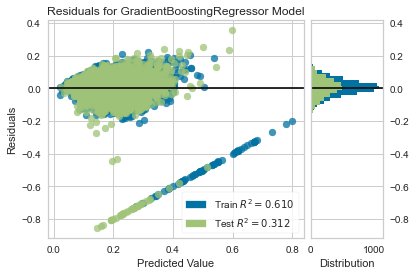

In [49]:
plot_model(tuned_gradientboost)

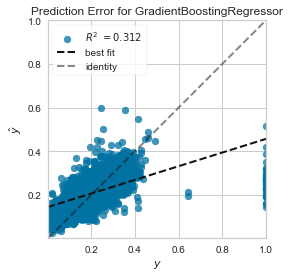

In [50]:
plot_model(tuned_gradientboost, plot='error')